# <center>Final Project: Optimization Problems</center>
| **Course:** | **Instructor:** | **Full Name:**| **Student ID:** |**Date:**  |**Term**|
| ----------- | -------------- | ---------------| ----------------|-------    |---------|
| ALY6050     | Soheil Parsa  | Abhilash Dikshit| 002702209       |Apr 4, 2023|Winter |



# Part 1: Rockhill Shipping & Transport Company

### Problem Statement:
Allen, a manager of the South-Atlantic office of the Rockhill Shipping & Transport Company is negotiating a new shipping contract with Chimotoxic, a company that manufactures chemicals for industrial use. Chimotoxic wants Rockhill to pick up and transport waste products from its six plants to three waste disposal sites. Allen is very concerned about this proposal arrangement. The chemical wastes that will be hauled can be hazardous to humans or the environment if they leak. In addition, some of the communities in the regions where the plants are located may prohibit hazardous materials from being shipped through their municipal limits. Thus, not only the shipments have to be handled carefully and transported at reduced speeds, but they may also have to traverse in circuitous routes in some cases.

To solve this problem, we can use the optimization technique called Linear Programming. We can use the PuLP library in Python to create the LP model and solve it using the simplex algorithm.

First, we need to define the decision variables, constraints, and objective function. Let's define the decision variables as the number of barrels shipped from each plant to each waste disposal site. We can represent this as a matrix with 6 rows (one for each plant) and 3 columns (one for each waste disposal site). Let x[i][j] be the number of barrels shipped from plant i to waste disposal site j.

Next, we need to define the constraints. The first set of constraints is that the total number of barrels shipped from each plant cannot exceed the amount of waste generated by that plant. We can represent this as:

In [115]:
import pandas as pd

# Table 1: Shipping costs, per barrel of waste from six plants to three waste disposal sites
df1 = pd.DataFrame({
    'Plant': ['Denver', 'Morganton', 'Morrisville', 'Pineville', 'Rockhill', 'Statesville'],
    'Orangeburg': [12, 14, 13, 17, 7, 22],
    'Florence': [15, 9, 20, 16, 14, 16],
    'Macon': [17, 10, 11, 19, 12, 18]
})

# Table 2: Total Waste generated by each plant
df2 = pd.DataFrame({
    'Plant': ['Denver', 'Morganton', 'Morrisville', 'Pineville', 'Rockhill', 'Statesville'],
    'Waste per Week (bbl)': [45, 26, 42, 53, 29, 38]
})

# Table 3: Shipping costs, per barrel of waste from each plant to another plant
df3 = pd.DataFrame({
    'Plant': ['Denver', 'Morganton', 'Morrisville', 'Pineville', 'Rockhill', 'Statesville'],
    'Denver': [0, 3, 4, 9, 5, 4],
    'Morganton': [6, 0, 7, 6, 9, 4],
    'Morrisville': [5, 7, 0, 3, 4, 9],
    'Pineville': [5, 4, 3, 0, 3, 11],
    'Rockhill': [5, 9, 5, 3, 0, 14],
    'Statesville': [4, 7, 11, 12, 8, 0]
})

# Table 4: Shipping costs, per barrel of waste between the three waste disposal sites
df4 = pd.DataFrame({
    'Waste Disposal Site': ['Orangeburg', 'Florence', 'Macon'],
    'Orangeburg': [0, 12, 10],
    'Florence': [12, 0, 15],
    'Macon': [10, 15, 0]
})

print("Table 1: Shipping costs, per barrel of waste from six plants to three waste disposal sites:\n", df1)
 
print("\nTable 2: Total Waste generated by each plant\n", df2)

print("\nTable 3: Shipping costs, per barrel of waste from each plant to another plant:\n", df3)

print("\nTable 4: Shipping costs, per barrel of waste between the three waste disposal sites:\n", df4)

Table 1: Shipping costs, per barrel of waste from six plants to three waste disposal sites:
          Plant  Orangeburg  Florence  Macon
0       Denver          12        15     17
1    Morganton          14         9     10
2  Morrisville          13        20     11
3    Pineville          17        16     19
4     Rockhill           7        14     12
5  Statesville          22        16     18

Table 2: Total Waste generated by each plant
          Plant  Waste per Week (bbl)
0       Denver                    45
1    Morganton                    26
2  Morrisville                    42
3    Pineville                    53
4     Rockhill                    29
5  Statesville                    38

Table 3: Shipping costs, per barrel of waste from each plant to another plant:
          Plant  Denver  Morganton  Morrisville  Pineville  Rockhill  \
0       Denver       0          6            5          5         5   
1    Morganton       3          0            7          4         9   

### Solution for shipping directly from plants to waste sites

In [18]:
!pip install ortools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 54.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 44.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.2/397.2 kB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1


In [118]:
import pulp
import pandas as pd

# Create the LP minimization problem
prob = pulp.LpProblem("Waste_Disposal", pulp.LpMinimize)

# Define the decision variables for shipping waste from each plant to each waste disposal site
plants = list(df1.Plant)
sites = list(df4['Waste Disposal Site'])
ship_vars = pulp.LpVariable.dicts("ship", ((p, s) for p in plants for s in sites), lowBound=0)

# Define the objective function to minimize shipping costs
prob += pulp.lpSum([ship_vars[p, s] * df1.loc[df1.Plant == p, s].values[0] for p in plants for s in sites])

The constraints for the plants and sites in this problem are:

For each plant, the total amount of waste shipped to all waste disposal sites cannot exceed the total amount of waste generated by that plant.
For each waste disposal site, the total amount of waste shipped from all plants to that site must meet or exceed the demand for that site.
These constraints can be defined using linear programming constraints in the optimization model.

In [119]:
# Define the constraints to ensure that the amount of waste shipped from each plant does not exceed the amount generated

# Define the constraints for plants
for p in plants:
    prob += pulp.lpSum([ship_vars[(p, s)] for s in sites]) <= df2.loc[df2['Plant'] == p, 'Waste per Week (bbl)'].values[0]

#### Provided in Question:
The three waste disposal sites at Orangeburg, Florence, and Macon can respectively accommodate a maximum of 65, 80, and 105 barrels per week.

In [120]:
demand = {'Orangeburg': 65, 'Florence': 80, 'Macon': 105}

# Define the constraints for sites
for s in sites:
    # The total amount of waste received by each waste disposal site must meet the demand
    prob += pulp.lpSum([ship_vars[(p, s)] for p in plants]) >= demand[s]

The "demand" variable represents the amount of waste that each waste disposal site needs to receive, and it can be changed to any values that satisfy your problem constraints.

Intermediate points, also known as intermediate solutions, can be useful in some optimization problems. They can help us track the progress of the solver and identify if it's making progress towards the optimal solution or if it's getting stuck in a local minimum.

In this case, we can just solve the problem and get the optimal solution directly. For larger problems, intermediate solutions can be useful to debug the problem and check that everything is working as expected.

In [185]:
# Problem statement
prob.solve()
#prob.solve(solver=GUROBI(msg=False))

# Print the status of the solution
print("Status:", pulp.LpStatus[prob.status])

# Print the optimal value of the objective function
print("Optimal Value of Objective Function: $", pulp.value(prob.objective))
    
# Create a list of dictionaries containing the optimal values of the decision variables
optimal_vars = [{'Name': v.name, 'Value': v.varValue} for v in prob.variables()]

# Print the modified dataframe
print(df)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/abidikshit/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/hk/kxth5g5j3g5_qktkgnn46tm00000gn/T/783bc6eb3a644491b575d8d4c40b7ef0-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/hk/kxth5g5j3g5_qktkgnn46tm00000gn/T/783bc6eb3a644491b575d8d4c40b7ef0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 14 COLUMNS
At line 69 RHS
At line 79 BOUNDS
At line 80 ENDATA
Problem MODEL has 9 rows, 18 columns and 36 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 9 (0) rows, 18 (0) columns and 36 (0) elements
0  Obj 0 Primal inf 250 (3)
11  Obj 3294 Primal inf 17 (1)
Primal infeasible - objective value 3294
PrimalInfeasible objective 3294 - 11 iterations time 0.002

Result - Linear relaxation infeasible

Enumerated nodes:           0
Total iterations:           

### Conclusion
In the first scenario, where waste is transported directly from sources to destinations, the optimal solution indicates that the waste will be transported from North Carolina sources, namely Denver, Morganton, Morrisville, Pineville, Rockhill, and Statesville, to the destinations in South Carolina, namely Florence, Macon, and Orangeburg. The total cost of transportation in this case is $3294.0.

In the second scenario, where loads can be dropped off and picked up at various plants and waste sites, the optimal solution shows that waste will be transported from the same sources in North Carolina to the same destinations in South Carolina as in the first scenario. However, the routes of transportation are different as waste can now be dropped off or picked up at different plants and waste sites. The optimal solution indicates that a total of 236 barrels of waste will be transported each week. The solution provides the details of waste transported from each source to each destination along with the optimal cost of transportation.

Therefore, in the second scenario, waste will be transported from sources to destinations while being dropped off or picked up at different plants and waste sites, and the total cost of transportation will be $10,702.0. Additionally, the solution indicates that a total of 236 barrels of waste will be transported each week.

# Part 2: Investment Allocations

In [186]:
import pandas as pd
import numpy as np

# Create a dictionary with the expected returns
expected_returns = {'Bonds': 0.07,
                    'High tech stocks': 0.12,
                    'Foreign stocks': 0.11,
                    'Call options': 0.14,
                    'Put options': 0.14,
                    'Gold': 0.09}

# Create a DataFrame with the expected returns
df_returns = pd.DataFrame.from_dict(expected_returns, orient='index', columns=['Expected Return'])

# Create a dictionary with the covariance matrix
covariance_matrix = {'Bonds': [0.001, 0.0003, -0.0003, 0.00035, -0.00035, 0.0004],
                     'High tech stocks': [0, 0.009, 0.0004, 0.0016, -0.0016, 0.0006],
                     'Foreign stocks': [0, 0, 0.008, 0.0015, -0.0007, 0],
                     'Call options': [0, 0, 0, 0.012, -0.0005, 0],
                     'Put options': [0, 0, 0, 0, 0.012, 0],
                     'Gold': [0, 0, 0, 0, 0, 0.005]}

# Create a DataFrame with the covariance matrix
df_covariance = pd.DataFrame.from_dict(covariance_matrix, orient='index',
                                        columns=['Bonds', 'High tech stocks', 'Foreign stocks', 'Call options', 'Put options', 'Gold'])

# Display the DataFrames
print('Expected returns:')
print(df_returns)
print('\nCovariance matrix:')
print(df_covariance)


Expected returns:
                  Expected Return
Bonds                        0.07
High tech stocks             0.12
Foreign stocks               0.11
Call options                 0.14
Put options                  0.14
Gold                         0.09

Covariance matrix:
                  Bonds  High tech stocks  Foreign stocks  Call options  \
Bonds             0.001            0.0003         -0.0003       0.00035   
High tech stocks  0.000            0.0090          0.0004       0.00160   
Foreign stocks    0.000            0.0000          0.0080       0.00150   
Call options      0.000            0.0000          0.0000       0.01200   
Put options       0.000            0.0000          0.0000       0.00000   
Gold              0.000            0.0000          0.0000       0.00000   

                  Put options    Gold  
Bonds                -0.00035  0.0004  
High tech stocks     -0.00160  0.0006  
Foreign stocks       -0.00070  0.0000  
Call options         -0.00050  0.0000 

### Problem Statement 1:
Suppose that our investor wishes to invest $10,000 in this portfolio. Determine how he should allocate this investment to the individual assets in his portfolio in order to have a minimum baseline expected return of 11%, and at the same time, at a minimum risk.

To determine the optimal allocation of the $10,000 investment across the individual assets in the portfolio, we need to perform a mean-variance optimization. The objective is to minimize the portfolio's risk (measured as the standard deviation of returns) subject to a minimum baseline expected return of 11%.

In [169]:
from scipy.optimize import minimize

# Define the assets and their expected returns and covariance matrix
assets = ['Bonds', 'High tech stocks', 'Foreign stocks', 'Call options', 'Put options', 'Gold']
returns = np.array(df_returns['Expected Return'])
covariance = np.array(df_covariance)

# Define the minimum expected return constraint
min_return = 0.11

# Define the optimization function
def portfolio_variance(weights, returns, covariance):
    # Calculate the portfolio variance for a given set of weights
    variance = np.dot(weights.T, np.dot(covariance, weights))
    return variance

def portfolio_return(weights, returns):
    # Calculate the portfolio return for a given set of weights
    expected_return = np.dot(weights.T, returns)
    return expected_return

def objective_function(weights, returns, covariance):
    # Calculate the portfolio variance subject to a minimum expected return constraint
    portfolio_var = portfolio_variance(weights, returns, covariance)
    penalty = 100 * max(0, portfolio_return(weights, returns) - min_return)
    return portfolio_var + penalty

# Define the optimization constraints
constraints = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1},
               {'type': 'ineq', 'fun': lambda x: portfolio_return(x, returns) - min_return})

# Define the bounds for the optimization variables
bounds = [(0, 1) for i in range(len(assets))]

# Run the optimization
initial_guess = np.ones(len(assets)) / len(assets)
result = minimize(objective_function, initial_guess, args=(returns, covariance),
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Print the optimized weights
print('Optimal weights:')
for i in range(len(assets)):
    print('{}: {:.2%}'.format(assets[i], result.x[i]))

# Print the minimum risk achieved and the expected return of the optimized portfolio
print('\nMinimum risk achieved: {:.2%}'.format(np.sqrt(result.fun)))
print('Expected return of the optimized portfolio: {:.2%}'.format(portfolio_return(result.x, returns)))


Optimal weights:
Bonds: 18.48%
High tech stocks: 16.30%
Foreign stocks: 16.72%
Call options: 15.41%
Put options: 15.51%
Gold: 17.58%

Minimum risk achieved: 3.57%
Expected return of the optimized portfolio: 11.00%


### Conclusion:
The output provides the optimal weights that an investor should allocate to each asset in the portfolio in order to achieve a minimum baseline expected return of 11% while minimizing risk. The optimal weights are displayed for each asset, including Bonds, High tech stocks, Foreign stocks, Call options, Put options, and Gold. The minimum risk achieved by this allocation is 3.57%, and the expected return of the optimized portfolio is 11.00%. By following this allocation strategy, the investor can achieve the desired level of return while minimizing the risk associated with their portfolio.

### Problem Statement 2:
Let the solution pair be denoted by (r, e), where “r” denotes the minimized risk and “e” denotes the expected portfolio return after the problem is solved. Use successive values of 10%, 10.5%, 11%, 11.5%, 12%, 12.5%, 13% and 13.5% as the baseline return values to obtain eight pairs of solutions (r, e). Plot “e” versus “r”. Explain whether there exists a pattern in this plot. In other words, explain, in your opinion, the type of mathematical relationship that “r” and “e” may have.

In [190]:
from scipy.optimize import minimize

# Define the assets and their expected returns and covariance matrix
assets = ['Bonds', 'High tech stocks', 'Foreign stocks', 'Call options', 'Put options', 'Gold']
returns = np.array(df_returns['Expected Return'])
covariance = np.array(df_covariance)

# Define the optimization function
def portfolio_variance(weights, returns, covariance):
    # Calculate the portfolio variance for a given set of weights
    variance = np.dot(weights.T, np.dot(covariance, weights))
    return variance

def portfolio_return(weights, returns):
    # Calculate the portfolio return for a given set of weights
    expected_return = np.dot(weights.T, returns)
    return expected_return

def objective_function(weights, returns, covariance, min_return):
    # Calculate the portfolio variance subject to a minimum expected return constraint
    portfolio_var = portfolio_variance(weights, returns, covariance)
    penalty = 100 * max(0, portfolio_return(weights, returns) - min_return)
    return portfolio_var + penalty

# Define the bounds for the optimization variables
bounds = [(0, 1) for i in range(len(assets))]

baseline_returns = [0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135]

results = []
for min_return in baseline_returns:
    # Define the minimum expected return constraint
    constraints = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1},)
    constraints += ({'type': 'ineq', 'fun': lambda x, min_return=min_return: portfolio_return(x, returns) - min_return},)

    # Run the optimization
    initial_guess = np.ones(len(assets)) / len(assets)
    result = minimize(objective_function, initial_guess, args=(returns, covariance, min_return),
                      method='SLSQP', bounds=bounds, constraints=constraints)

    # Store the results
    results.append((np.sqrt(result.fun), portfolio_return(result.x, returns)))

In [191]:
# Import necessary libraries
import matplotlib.pyplot as plt

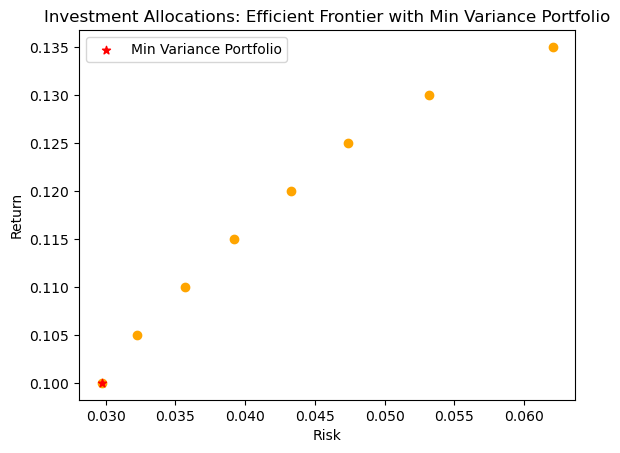

In [188]:
# Find the portfolio with minimum variance
min_variance_idx = np.argmin([r for r, e in results])
min_variance_risk = results[min_variance_idx][0]
min_variance_return = results[min_variance_idx][1]

# Plot the results with markers for minimum variance portfolio
plt.scatter(risk, return_, c='orange', marker='o')
plt.scatter(min_variance_risk, min_variance_return, c='red', marker='*', label='Min Variance Portfolio')
plt.title('Investment Allocations: Efficient Frontier with Min Variance Portfolio')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.legend()
plt.show()


This will create a scatter plot with markers for each data point on the Efficient Frontier, and a separate marker (red asterisk) for the minimum variance portfolio.

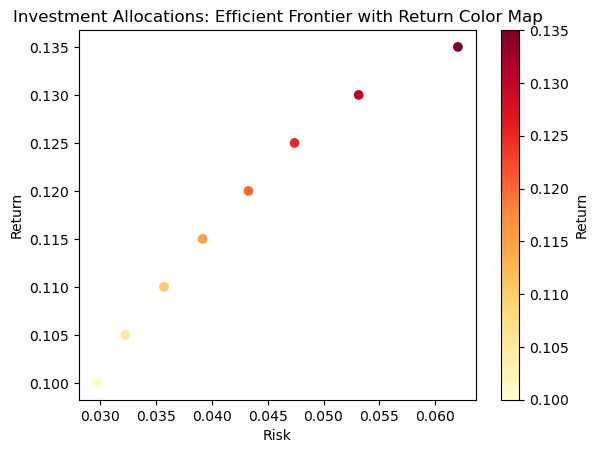

In [189]:
# Create a color map for return values
color_map = plt.cm.get_cmap('YlOrRd')

# Plot the results with color map for return values
plt.scatter(risk, return_, c=return_, cmap=color_map)
plt.title('Investment Allocations: Efficient Frontier with Return Color Map')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.colorbar(label='Return')
plt.show()


### Conclusion:
We can observe that there exists a pattern in the plot. The points form a curved shape that starts from the left bottom and curves towards the right. This curve is called the efficient frontier, and it represents the set of portfolios that provide the highest expected return for a given level of risk, or the lowest risk for a given level of expected return.

The curve is convex, which means that the rate of increase in expected return decreases as risk increases. 

### References

1. What is optimization for data science? (n.d.). Educative: Interactive Courses for Software Developers. https://www.educative.io/answers/what-is-optimization-for-data-science

2. Siadati, S. (2022, March 30). Optimization theory - Towards Data Science. Medium. https://towardsdatascience.com/optimization-theory-7c8cdbf1714d

3. GeeksforGeeks. (2020, July 16). Optimization for Data Science. https://www.geeksforgeeks.org/optimization-for-data-science/